In [1]:
import numpy as np
import pandas as pd

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
all_labels = pd.read_csv('../classifications_horton_et_al_2025_filtered.csv')

kept_labels = ['fri', 'frii', 'hybrid', 'spiral', 'relaxed', 'cshaped',
       'sshaped', 'misaligned', 'wings', 'xshaped', 'straight',
       'multihotspots', 'continuous', 'banding', 'onesided', 'restarted',
       'cluster', 'merger', 'diffuse']

data = all_labels[kept_labels]
print(data.shape)
print(data.columns)

(7607, 19)
Index(['fri', 'frii', 'hybrid', 'spiral', 'relaxed', 'cshaped', 'sshaped',
       'misaligned', 'wings', 'xshaped', 'straight', 'multihotspots',
       'continuous', 'banding', 'onesided', 'restarted', 'cluster', 'merger',
       'diffuse'],
      dtype='object')


In [3]:
rd_idx = np.random.choice(data.shape[0], size=(1,))

fid_label = data.iloc[rd_idx,:]
fid_label

,fri,frii,hybrid,spiral,relaxed,cshaped,sshaped,misaligned,wings,xshaped,straight,multihotspots,continuous,banding,onesided,restarted,cluster,merger,diffuse
4293,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
from scipy.spatial.distance import cdist
print(fid_label.shape, data.shape)

fid_label = data.iloc[rd_idx,:]
data_nofid = data.iloc[np.argwhere(np.arange(data.shape[0])!=rd_idx).squeeze(),:]
out = cdist(fid_label, data_nofid, metric='cityblock')
weights = (1/(out-out.min()+1).squeeze())**2
weights = weights #/weights.sum()

print(weights.shape, out.shape)
print(weights)

(1, 19) (7607, 19)
(7606,) (1, 7606)
[0.11111111 0.0625     0.0625     ... 0.0625     0.04       1.        ]


<BarContainer object of 9 artists>

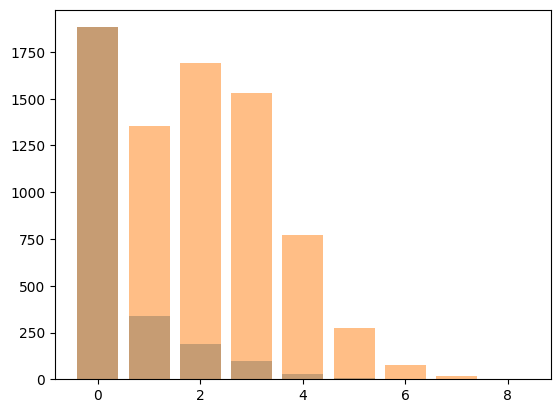

In [5]:
bins = np.arange(0, np.max(out)+2)
h,b = np.histogram(out.squeeze(), bins=(bins-0.5), weights=weights)
h_now,b = np.histogram(out.squeeze(), bins=(bins-0.5))
bar(bins[:-1], h, alpha=0.5)
bar(bins[:-1], h_now, alpha=0.5)


In [6]:
count_alone = 0

for i in range(data.shape[0]):
    fid_label = data.iloc[i,:]
    data_no_i = data.iloc[np.argwhere(np.arange(data.shape[0])!=i).squeeze(),:]
    #print(data_no_i.shape, fid_label.shape)
    out = cdist(fid_label.values[None,:], data_no_i, metric='cityblock')
    if out.min()>0:
        count_alone += 1
        print(f"Img {i} has lowest neighbour at d={out.min()}. Number of closests: {(out==out.min()).sum()}")
    #break
print(out)
print(count_alone)

Img 7 has lowest neighbour at d=1.0. Number of closests: 34
Img 19 has lowest neighbour at d=1.0. Number of closests: 57
Img 39 has lowest neighbour at d=1.0. Number of closests: 20
Img 70 has lowest neighbour at d=1.0. Number of closests: 4
Img 90 has lowest neighbour at d=1.0. Number of closests: 18
Img 130 has lowest neighbour at d=1.0. Number of closests: 2
Img 135 has lowest neighbour at d=1.0. Number of closests: 189
Img 167 has lowest neighbour at d=1.0. Number of closests: 7
Img 219 has lowest neighbour at d=1.0. Number of closests: 24
Img 240 has lowest neighbour at d=1.0. Number of closests: 36
Img 241 has lowest neighbour at d=1.0. Number of closests: 42
Img 283 has lowest neighbour at d=2.0. Number of closests: 33
Img 305 has lowest neighbour at d=1.0. Number of closests: 15
Img 361 has lowest neighbour at d=1.0. Number of closests: 235
Img 378 has lowest neighbour at d=1.0. Number of closests: 13
Img 439 has lowest neighbour at d=1.0. Number of closests: 7
Img 472 has lowe

<BarContainer object of 9 artists>

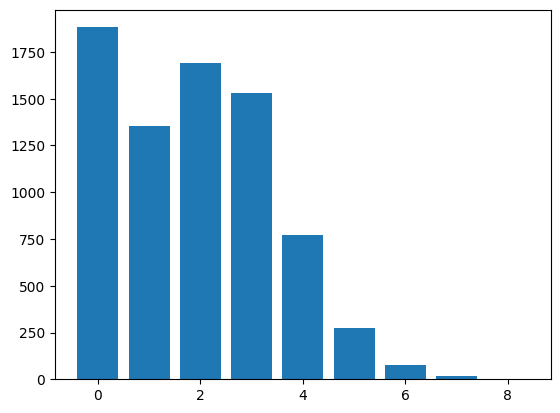

In [7]:
bins = np.arange(0, np.max(out)+2)
h,b = np.histogram(out, bins=(bins-0.5))
bar(bins[:-1], h)

In [8]:
check = data.loc[:,['fri', 'frii', 'hybrid', 'spiral', 'relaxed']].values.sum(axis=1)
print(np.sum(check<1))
print(np.argwhere(check<1).flatten())

print(all_labels.iloc[56,:])

245
[  15   41   50   54   56   63   66   78  107  111  116  118  135  178
  199  220  221  243  356  360  365  396  403  406  412  471  487  489
  506  579  597  679  692  723  734  736  756  764  774  829 1061 1068
 1073 1126 1195 1270 1309 1314 1316 1370 1438 1482 1530 1668 1685 1779
 1818 1847 1882 1914 2003 2006 2063 2067 2074 2088 2095 2134 2185 2187
 2191 2211 2221 2273 2315 2316 2327 2341 2359 2385 2399 2409 2507 2512
 2543 2593 2627 2660 2673 2743 2767 2838 2870 2880 2904 2905 2936 3071
 3084 3187 3331 3344 3352 3392 3441 3491 3523 3547 3557 3565 3644 3759
 3761 3784 3808 3809 3810 3930 3936 3955 3988 4010 4012 4013 4014 4021
 4062 4086 4089 4091 4106 4173 4175 4223 4256 4272 4299 4324 4428 4528
 4628 4643 4658 4700 4714 4737 4738 4755 4778 4798 4832 4851 4884 4960
 4968 4979 5057 5082 5199 5200 5239 5297 5324 5347 5368 5381 5437 5440
 5494 5496 5497 5558 5561 5567 5575 5621 5629 5679 5714 5787 5805 5835
 5837 5839 5853 5908 5916 5957 5992 6030 6058 6068 6143 6155 6183 6200
 6

In [35]:
def sample_closest(fid_idx, all_tags):
    fid_label = all_tags.iloc[rd_idx,:]
    all_tags_nofid = all_tags.drop(rd_idx)
    print(all_tags_nofid.shape, fid_label.shape)
    pi = cdist(fid_label, all_tags_nofid, metric='cityblock')
    weights = ((pi-pi.min())==0).squeeze()
    weights = weights/weights.sum()
    sample = np.random.choice(all_tags.shape[0]-1, p=weights)
    return np.atleast_1d(all_tags_nofid.index[sample])

def sample_weighted(fid_idx, all_tags):
    fid_label = all_tags.iloc[rd_idx,:]
    all_tags_nofid = all_tags.iloc[np.argwhere(np.arange(all_tags.shape[0])!=rd_idx).squeeze(),:]
    pi = cdist(fid_label, all_tags_nofid, metric='cityblock')
    weights = 1/(pi-pi.min()+1).squeeze()**2
    weights = weights/weights.sum()
    sample = np.random.choice(all_tags.shape[0]-1, p=weights)
    return np.atleast_1d(all_tags_nofid.index[sample])

In [36]:
rd_idx = np.random.choice(data.shape[0], size=(1,))

pos_idx1 = sample_closest(rd_idx, data)
print(pos_idx1)
print(data.iloc[rd_idx,:].values)
print(data.iloc[pos_idx1,:].values)

pos_idx1 = sample_weighted(rd_idx, data)
print(data.iloc[rd_idx,:].values)
print(data.iloc[pos_idx1,:].values)


(7606, 19) (1, 19)
[6799]
[[False  True False False False False False False  True False False False
  False False False False False False False]]
[[False  True False False False False False False  True False False False
  False False False False False False False]]
[[False  True False False False False False False  True False False False
  False False False False False False False]]
[[False  True False False False False False False False False False False
  False False False False False False False]]


In [32]:
rd_idx = [0] #np.random.choice(data.shape[0], size=(1,))
fid_label = data.iloc[rd_idx,:]
all_tags_nofid = data.drop(rd_idx)
print(all_tags_nofid.shape, fid_label.shape)
pi = cdist(fid_label, all_tags_nofid, metric='cityblock')
weights = ((pi-pi.min())==0).squeeze()
weights = weights/weights.sum()
sample = np.random.choice(all_tags_nofid.shape[0], p=weights)
idx_samp = all_tags_nofid.index[sample]
print(sample, idx_samp)

(7606, 19) (1, 19)
4031 4032
